<div style="text-align:center">
    <h1>
        Off-policy Monte Carlo Control
    </h1>
</div>
<br>

In this notebook we are going to implement the other of the two major strategies that exist when learning a policy by interacting with the environment, called off-policy learning. We will use two policies: 
    
- An exploratory policy called b.
    
- A target policy that will learn from the experience collected by b, called $\pi$


## Import the necessary software libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [3]:
env = Maze()

2023-03-20 22:42:40.381 python[4378:102613] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcab154a030>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:42:40.382 python[4378:102613] Warning: Expected min height of view: (<NSButton: 0x7fcab14b0720>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:42:40.383 python[4378:102613] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcab14b2ac0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:42:40.383 python[4378:102613] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcab14b57d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


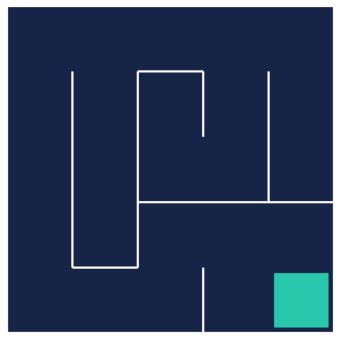

In [4]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(frame)

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [6]:
action_values = np.full((5,5,4), -100)
action_values[4,4,:] = 0.

#### Plot $Q(s, a)$

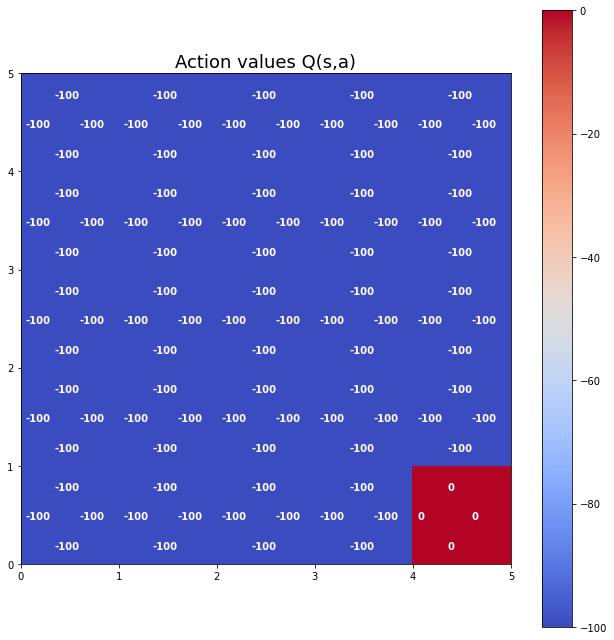

In [7]:
plot_action_values(action_values)

## Define the target policy $\pi(s)$

#### Create the policy $\pi(s)$

In [8]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Test the policy with state (0, 0)

In [9]:
action = target_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 0


#### Plot the policy

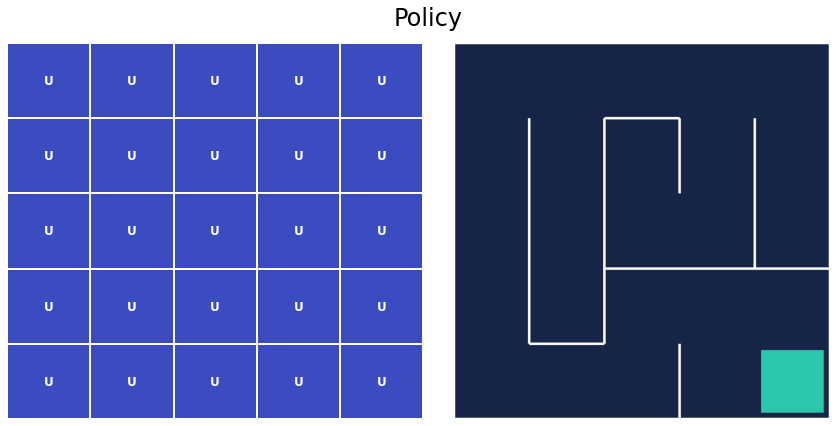

In [10]:
plot_policy(action_values, frame)

## Define the exploratory policy $b(s)$

#### Create the policy $b(s)$

In [11]:
def exploratory_policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

#### Test the policy with state (0, 0)

In [12]:
action = exploratory_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


#### Plot the policy

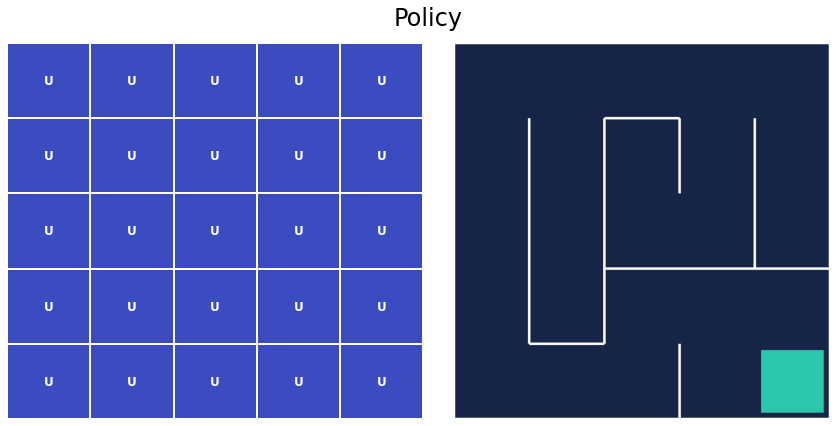

In [13]:
plot_policy(action_values, frame)

## Implement the algorithm

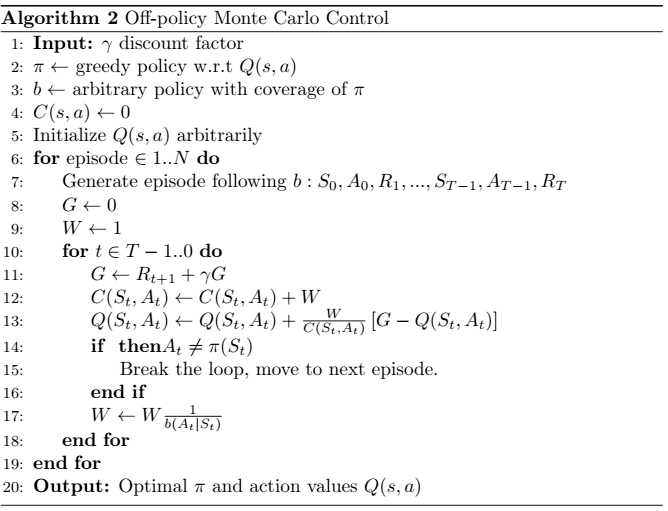

</br>



<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [14]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        G = 0
        W = 1
        csa = np.zeros((5, 5, 4))
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
#             env.render()
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa)

            if action_t != target_policy(state_t):
                break

            W = W * 1. / (1 - epsilon + epsilon/4)


In [15]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000, epsilon=0.3)

## Show results

#### Show resulting value table $Q(s, a)$

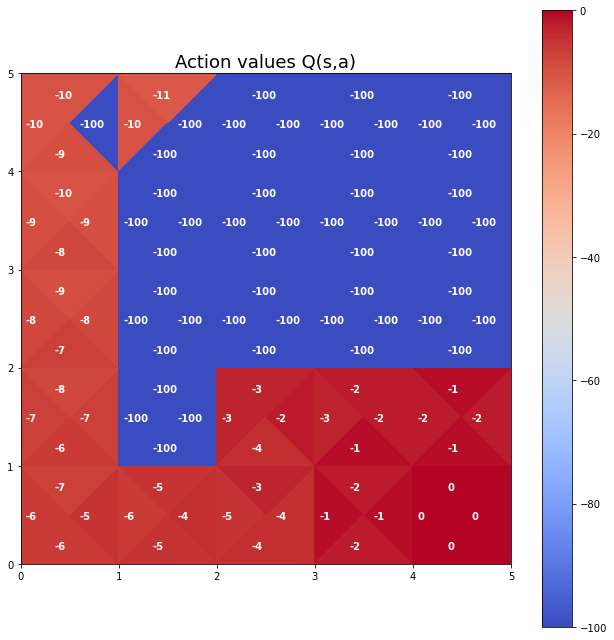

In [16]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

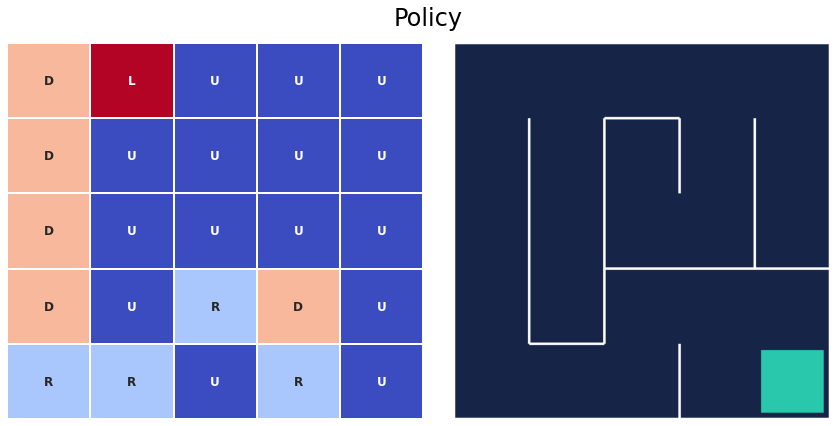

In [17]:
plot_policy(action_values, frame)

#### Test the resulting agent

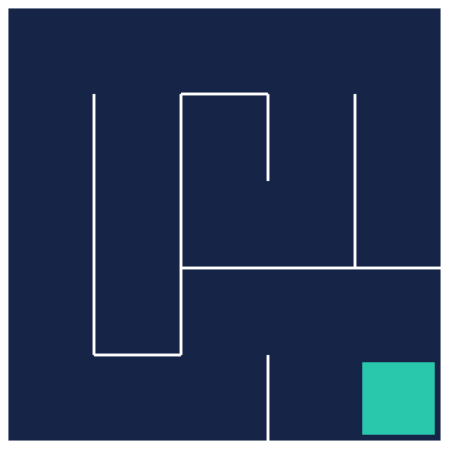

In [18]:
test_agent(env, target_policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 5: Monte Carlo methods](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)